In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Diabetes\cleaned_dataset_diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,1.460250,28.1,0.861443,1.288798,0
1,0,137.0,40.0,35.0,1.532648,43.1,1.071407,1.338267,1
2,3,78.0,50.0,32.0,1.452246,31.0,0.890303,1.311941,1
3,2,197.0,70.0,45.0,1.690052,30.5,0.857475,1.392162,1
4,1,189.0,60.0,23.0,1.753669,30.1,0.926098,1.404659,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,1.681244,43.3,0.882124,1.311941,1
388,1,128.0,88.0,39.0,1.479504,36.5,1.004630,1.351088,1
389,2,88.0,58.0,26.0,1.259921,28.4,0.978030,1.293804,0
390,10,101.0,76.0,48.0,1.541485,32.9,0.863144,1.412359,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    float64
 8   Outcome                   392 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 27.7 KB


In [5]:
df['Outcome'].unique()

array([0, 1], dtype=int64)

In [6]:
df['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

# X and y

In [7]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train.iloc[ : , 1 : 8] = sc.fit_transform(X_train.iloc[:, 1 : 8])
X_test.iloc[: , 1: 8] = sc.transform(X_test.iloc[:, 1 : 8])

# Modelling


**Logistic regression(BaseLine model)**

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

**Train**

In [11]:
# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


Train Accuracy :  0.7955271565495208
CV SCORE :  0.7920122887864822


**Test**

In [12]:
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Test Accuracy :  0.759493670886076


# Confusion Metrics

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[49,  8],
       [11, 11]], dtype=int64)

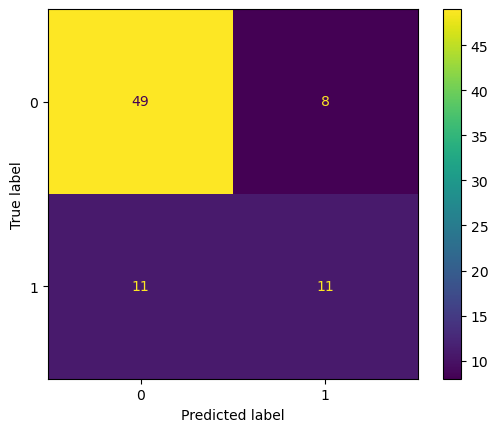

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Outcome'].unique()).plot()
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        57
           1       0.58      0.50      0.54        22

    accuracy                           0.76        79
   macro avg       0.70      0.68      0.69        79
weighted avg       0.75      0.76      0.75        79



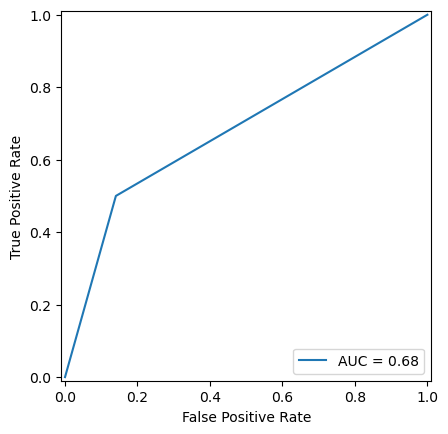

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc= roc_auc).plot()
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred_test)

0.6798245614035088